<a href="https://colab.research.google.com/github/Nithinan-Srikongphan/bsc_dpdm24/blob/main/HW3(group).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ข้อที่ 1 วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป**

In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ระบุเส้นทางของไฟล์
file_path = '/content/drive/MyDrive/Data_BSC_DPDM24/reduced_marketbasket.csv'

# อ่านไฟล์ CSV โดยระบุ encoding เป็น 'latin1'
df = pd.read_csv(file_path, encoding='latin1')

# แสดงข้อมูลตัวอย่าง
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  
2  12/01/2010 08:26       2.75     17850.0  United Kingdom  
3  12/01/2010 08:26       3.39     17850.0  United Kingdom  
4  12/01/2010 08:26       3.39     17850.0  United Kingdom  


In [ ]:
print(len(df))

541909


In [ ]:
# prompt: แสดงประเทศทั้งหมดพร้อมจำนวน

# นับจำนวนประเทศทั้งหมดพร้อมจำนวน
country_counts = df['Country'].value_counts()
country_counts

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [ ]:
# prompt: จัดการของมูลประเทศ แยกออกมาสร้างคอลัมน์ ทวีป พร้อมแสดงข้อมูลเป็นตารางเข้าใจง่าย

import pandas as pd

# สร้าง dictionary เพื่อเก็บข้อมูลทวีปของแต่ละประเทศ
continent_mapping = {
    # ยุโรป (Europe)
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Finland': 'Europe',
    'Greece': 'Europe',
    'Czech Republic': 'Europe',
    'European Community': 'Europe',
    'Malta': 'Europe',

    # เอเชีย (Asia)
    'Japan': 'Asia',
    'Cyprus': 'Asia',
    'Israel': 'Asia',
    'Bahrain': 'Asia',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',

    # โอเชียเนีย (Oceania)
    'Australia': 'Oceania',

    # อเมริกาเหนือ (North America)
    'Canada': 'North America',
    'USA': 'North America',

    # อเมริกาใต้ (South America)
    'Brazil': 'South America',

    # แอฟริกา (Africa)
    'RSA': 'Africa',

    # ไม่ระบุทวีป (Unspecified)
    'Unspecified': 'Unknown'
}

# สร้างคอลัมน์ 'Continent' โดยใช้ mapping
df['Continent'] = df['Country'].map(continent_mapping)

# แสดงตารางโดยเรียงลำดับตามทวีปและประเทศ
display(df.sort_values(by=['Continent', 'Country']))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
395472,571035,21238,RED RETROSPOT CUP,8,10/13/2011 12:50,0.85,12446.0,RSA,Africa
395473,571035,21243,PINK POLKADOT PLATE,8,10/13/2011 12:50,1.69,12446.0,RSA,Africa
395474,571035,23240,SET OF 4 KNICK KNACK TINS DOILY,6,10/13/2011 12:50,4.15,12446.0,RSA,Africa
395475,571035,23209,LUNCH BAG VINTAGE DOILY,10,10/13/2011 12:50,1.65,12446.0,RSA,Africa
395476,571035,23201,JUMBO BAG ALPHABET,10,10/13/2011 12:50,2.08,12446.0,RSA,Africa
...,...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,11/24/2011 14:55,1.25,NaN,Unspecified,Unknown
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,11/24/2011 14:55,1.25,NaN,Unspecified,Unknown
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,11/24/2011 14:55,1.65,NaN,Unspecified,Unknown
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,11/24/2011 14:55,0.55,NaN,Unspecified,Unknown


In [ ]:
# prompt: ตรวจสอบค่าว่างทั้งหมด แสดงแค่ค่าว่าง

# แสดงค่าว่างในแต่ละคอลัมน์
print(df.isnull().sum())

# แสดงเฉพาะแถวที่มีค่าว่างในคอลัมน์ใด ๆ
print(df[df.isnull().any(axis=1)])

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Continent           0
dtype: int64
       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES

In [ ]:
# สร้างคอลัมน์ 'Continent' โดยใช้ mapping
df['Continent'] = df['Country'].map(continent_mapping)

# จัดการค่าว่าง
df['Description'] = df['Description'].fillna('Unknown')
df['CustomerID'] = df['CustomerID'].fillna('Unknown')


# แสดงข้อมูล
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,Europe
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,Europe


In [ ]:
# นับจำนวน transaction ในแต่ละทวีป
continent_counts = df['Continent'].value_counts()

# แสดงผลลัพธ์
continent_counts

,count
Continent,
Europe,537736
Asia,1936
Oceania,1259
Unknown,446
North America,442
Africa,58
South America,32


In [ ]:
# prompt: วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป แสดง CustomerID  InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice Continent  แยกออกมาเป็นคนๆ ตาม CustomerID

# Group data by CustomerID and display the specified columns
customer_behavior = df.groupby('CustomerID').agg({
    'InvoiceNo': list,
    'StockCode': list,
    'Description': list,
    'Quantity': list,
    'InvoiceDate': list,
    'UnitPrice': list,
    'Continent': 'first'  # Take the first continent value for each customer
})

# Reset index to make CustomerID a regular column
customer_behavior = customer_behavior.reset_index()

# Display the result
display(customer_behavior)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Continent
0,12346.0,"[541431, C541433]","[23166, 23166]","[MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...","[74215, -74215]","[1/18/2011 10:01, 1/18/2011 10:17]","[1.04, 1.04]",Europe
1,12347.0,"[537626, 537626, 537626, 537626, 537626, 53762...","[85116, 22375, 71477, 22492, 22771, 22772, 227...","[BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ...","[12, 4, 12, 36, 12, 12, 12, 12, 12, 12, 4, 4, ...","[12/07/2010 14:57, 12/07/2010 14:57, 12/07/201...","[2.1, 4.25, 3.25, 0.65, 1.25, 1.25, 1.25, 1.25...",Europe
2,12348.0,"[539318, 539318, 539318, 539318, 539318, 53931...","[84992, 22951, 84991, 84991, 21213, 21213, 226...","[72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASES...","[72, 72, 24, 120, 24, 120, 72, 144, 144, 48, 7...","[12/16/2010 19:09, 12/16/2010 19:09, 12/16/201...","[0.55, 0.55, 0.55, 0.42, 0.55, 0.42, 0.29, 0.2...",Europe
3,12349.0,"[577609, 577609, 577609, 577609, 577609, 57760...","[23112, 23460, 21564, 21411, 21563, 22131, 221...","[PARISIENNE CURIO CABINET, SWEETHEART WALL TID...","[2, 2, 6, 3, 6, 6, 12, 2, 12, 2, 12, 12, 6, 3,...","[11/21/2011 9:51, 11/21/2011 9:51, 11/21/2011 ...","[7.5, 9.95, 2.95, 4.25, 2.95, 1.95, 1.65, 8.25...",Europe
4,12350.0,"[543037, 543037, 543037, 543037, 543037, 54303...","[21908, 22412, 79066K, 79191C, 22348, 84086C, ...","[CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NEI...","[12, 12, 10, 12, 24, 6, 12, 12, 12, 12, 12, 12...","[02/02/2011 16:01, 02/02/2011 16:01, 02/02/201...","[2.1, 2.1, 0.85, 0.85, 0.85, 2.95, 1.65, 1.65,...",Europe
...,...,...,...,...,...,...,...,...
4368,18281.0,"[556464, 556464, 556464, 556464, 556464, 55646...","[22037, 22716, 22028, 23007, 23008, 23209, 22467]","[ROBOT BIRTHDAY CARD, CARD CIRCUS PARADE, PENN...","[12, 12, 12, 1, 1, 10, 6]","[06/12/2011 10:53, 06/12/2011 10:53, 06/12/201...","[0.42, 0.42, 0.42, 16.95, 16.95, 1.65, 2.55]",Europe
4369,18282.0,"[562525, 562525, 562525, 562525, 562525, 56252...","[21270, 23187, 23295, 22089, 21108, 21109, 224...","[ANTIQUE CREAM CUTLERY CUPBOARD, FRENCH STYLE ...","[1, 48, 8, 6, 9, 2, 1, -5, 2, 6, 12, 4, 4]","[08/05/2011 13:35, 08/05/2011 13:35, 08/05/201...","[12.75, 0.29, 0.83, 2.95, 2.55, 6.75, 12.75, 0...",Europe
4370,18283.0,"[540350, 540350, 540350, 540350, 540350, 54035...","[22356, 20726, 22384, 22386, 20717, 20718, 850...","[CHARLOTTE BAG PINK POLKADOT, LUNCH BAG WOODLA...","[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, ...","[01/06/2011 14:14, 01/06/2011 14:14, 01/06/201...","[0.85, 1.65, 1.65, 1.95, 1.25, 1.25, 1.95, 1.9...",Europe
4371,18287.0,"[554065, 554065, 554065, 554065, 554065, 55406...","[22755, 22754, 22753, 22756, 22758, 22757, 227...","[SMALL PURPLE BABUSHKA NOTEBOOK , SMALL RED BA...","[12, 12, 12, 12, 12, 12, 4, 6, 6, 6, 6, 4, 6, ...","[5/22/2011 10:39, 5/22/2011 10:39, 5/22/2011 1...","[0.85, 0.85, 0.85, 1.25, 1.25, 1.25, 8.5, 2.55...",Europe


##**ทำไมถึงเลือกแสดงข้อมูลข้างต้น**
เพราะเป็นตัวแปรที่สำคัญสำหรับวิเคราะห์พฤติกรรมผู้บริโภค
CustomerID: ระบุและติดตามพฤติกรรมของลูกค้า

InvoiceDate: วิเคราะห์ช่วงเวลาที่ลูกค้าซื้อสินค้า

Quantity: ดูจำนวนการซื้อสินค้า

StockCode / Description: วิเคราะห์สินค้าที่ลูกค้าสนใจ

UnitPrice: วิเคราะห์พฤติกรรมด้านการใช้จ่าย

Continent: วิเคราะห์พฤติกรรมตามพื้นที่ทวีป

In [ ]:
# prompt: แสดงลูกค้าที่ Quantity มากสุดไปน้อยสุด

# Sort the customer_behavior DataFrame by Quantity in descending order
customer_quantity_sorted = customer_behavior.sort_values(by='Quantity', ascending=False)

# Display the sorted DataFrame
display(customer_quantity_sorted)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Continent
0,12346.0,"[541431, C541433]","[23166, 23166]","[MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...","[74215, -74215]","[1/18/2011 10:01, 1/18/2011 10:17]","[1.04, 1.04]",Europe
692,13256.0,[578841],[84826],[ASSTD DESIGN 3D PAPER STICKERS],[12540],[11/25/2011 15:57],[0.0],Europe
603,13135.0,[554868],[22197],[SMALL POPCORN HOLDER],[4300],[5/27/2011 10:52],[0.72],Europe
3256,16754.0,"[536830, 536830]","[84077, 21915]","[WORLD WAR 2 GLIDERS ASSTD DESIGNS, RED HARMO...","[2880, 1400]","[12/02/2010 17:38, 12/02/2010 17:38]","[0.18, 1.06]",Europe
2945,16333.0,"[543057, 543057, 543842, 544478, 545644, 54564...","[84077, 21915, 22693, 21749, 22440, 21891, 840...","[WORLD WAR 2 GLIDERS ASSTD DESIGNS, RED HARMO...","[2592, 420, 1056, 216, 1200, 576, 1152, 280, 3...","[02/03/2011 10:50, 02/03/2011 10:50, 2/14/2011...","[0.21, 1.06, 1.06, 1.85, 0.36, 1.06, 0.21, 1.0...",Europe
...,...,...,...,...,...,...,...,...
3650,17307.0,[C538110],[21232],[STRAWBERRY CERAMIC TRINKET BOX],[-144],[12/09/2010 15:24],[1.06],Europe
3712,17389.0,"[C540109, 540985, 540985, 540985, 541124, C541...","[85071A, 84970S, 22605, 21586, 85066, 22207, 2...","[BLUE CHARLIE+LOLA PERSONAL DOORSIGN, HANGING ...","[-150, 6, 6, 12, 12, -1, 6, 6, 6, 6, 6, 12, 12...","[01/04/2011 17:12, 01/12/2011 15:48, 01/12/201...","[2.95, 0.64, 12.75, 2.1, 10.95, 3.75, 8.5, 10....",Europe
3722,17404.0,"[C538847, 538848, 539338, 539338, 539338, 5393...","[85232B, 85232B, 84077, 22951, 22417, 21977, 8...","[SET OF 3 BABUSHKA STACKING TINS, SET OF 3 BAB...","[-240, 240, 576, 240, 240, 240, 240, 240, 144,...","[12/14/2010 13:27, 12/14/2010 13:28, 12/17/201...","[4.95, 4.95, 0.29, 0.55, 0.55, 0.55, 0.55, 0.5...",Europe
440,12908.0,"[C542693, 542694, 557092, C570708]","[15036, 15036, 15036, M]","[ASSORTED COLOURS SILK FAN, ASSORTED COLOURS S...","[-600, 600, 600, -600]","[1/31/2011 12:36, 1/31/2011 12:37, 6/16/2011 1...","[0.65, 0.53, 0.72, 0.19]",Europe


In [ ]:
# prompt: แสดง StockCode / Description: วิเคราะห์สินค้าที่ลูกค้าสนใจ ยอดนิยมในแต่ละ ทวีป

# Group data by Continent and StockCode, then count occurrences
popular_products_by_continent = df.groupby(['Continent', 'StockCode', 'Description'])['InvoiceNo'].count().reset_index(name='Count')

# Sort within each continent by count in descending order
popular_products_by_continent = popular_products_by_continent.sort_values(['Continent', 'Count'], ascending=[True, False])

# Display the result
display(popular_products_by_continent)

,Continent,StockCode,Description,Count
0,Africa,20676,RED RETROSPOT BOWL,1
1,Africa,20677,PINK POLKADOT BOWL,1
2,Africa,20718,RED RETROSPOT SHOPPER BAG,1
3,Africa,20725,LUNCH BAG RED RETROSPOT,1
4,Africa,21238,RED RETROSPOT CUP,1
...,...,...,...,...
8132,Unknown,85179C,PINK BITTY LIGHT CHAIN,1
8133,Unknown,85180A,RED HEARTS LIGHT CHAIN,1
8134,Unknown,85180B,PINK HEARTS LIGHT CHAIN,1
8135,Unknown,85212,MINI PAINTED GARDEN DECORATION,1


,Continent,Description,Count
0,Africa,4 TRADITIONAL SPINNING TOPS,1
1,Africa,ALARM CLOCK BAKELIKE RED,1
2,Africa,ASSORTED BOTTLE TOP MAGNETS,1
3,Africa,BAKING SET 9 PIECE RETROSPOT,1
4,Africa,BELLE JARDINIERE CUSHION COVER,1
...,...,...,...
6602,Unknown,WRAP POPPIES DESIGN,1
6603,Unknown,WRAP SUKI AND FRIENDS,1
6604,Unknown,WRAP VINTAGE PETALS DESIGN,1
6605,Unknown,WRAP WEDDING DAY,1


<ipython-input-11-0504ad97fe38>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Description', data=top_products, palette='viridis')


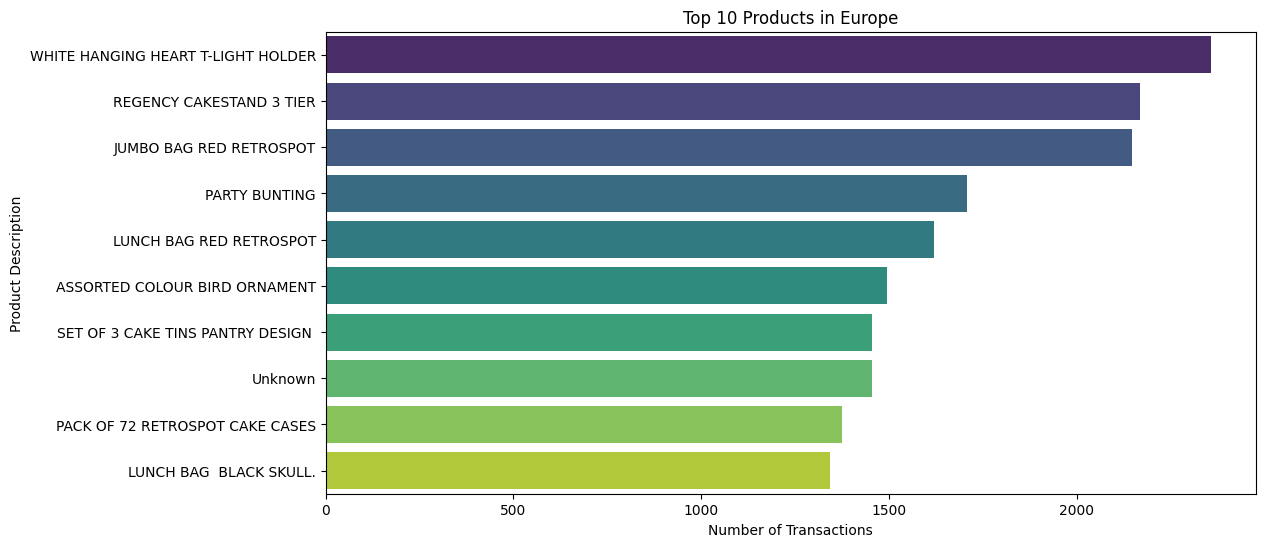

<ipython-input-11-0504ad97fe38>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Description', data=top_products, palette='viridis')


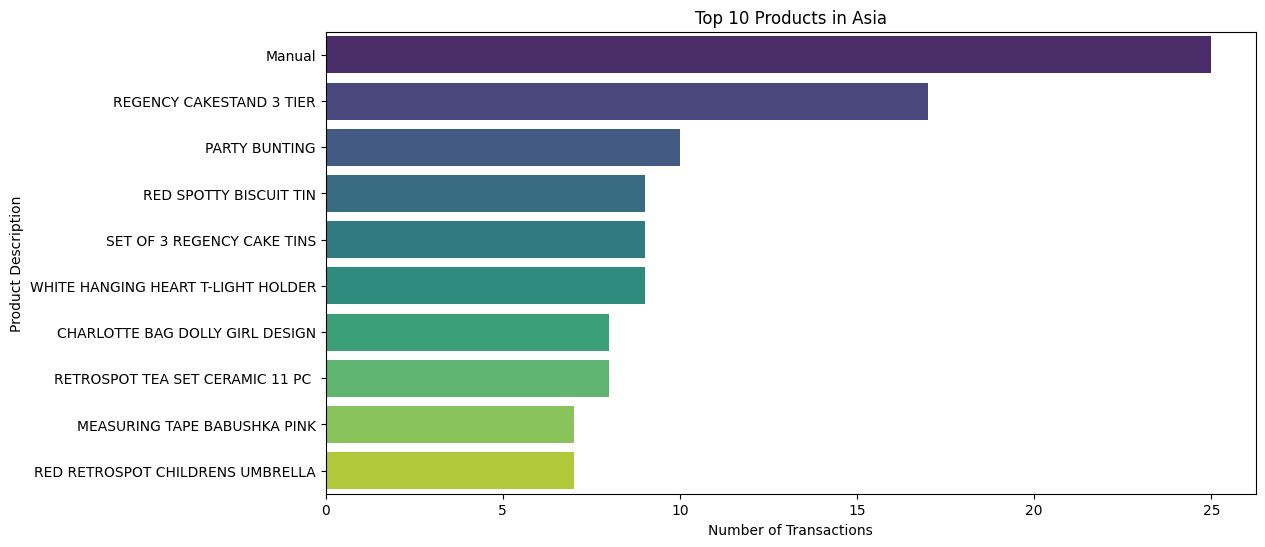

<ipython-input-11-0504ad97fe38>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Description', data=top_products, palette='viridis')


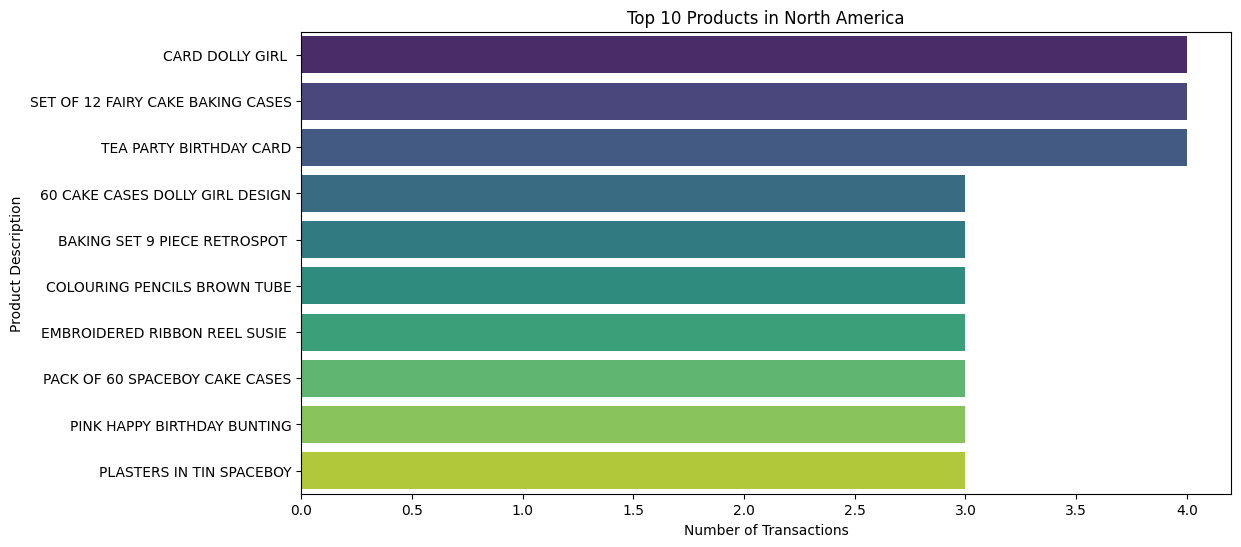

<ipython-input-11-0504ad97fe38>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Description', data=top_products, palette='viridis')


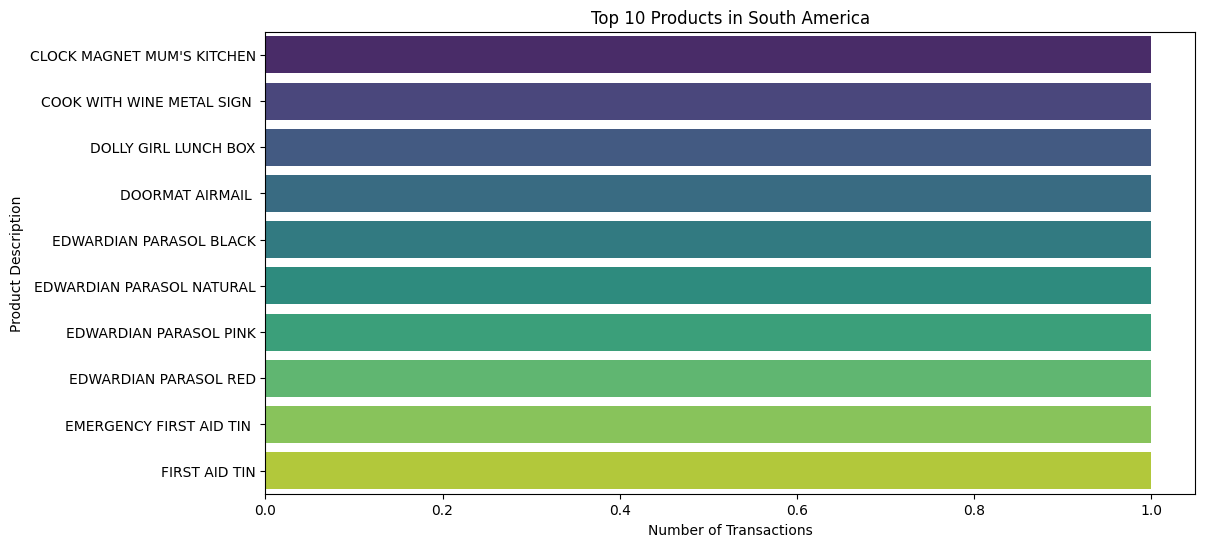

<ipython-input-11-0504ad97fe38>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Description', data=top_products, palette='viridis')


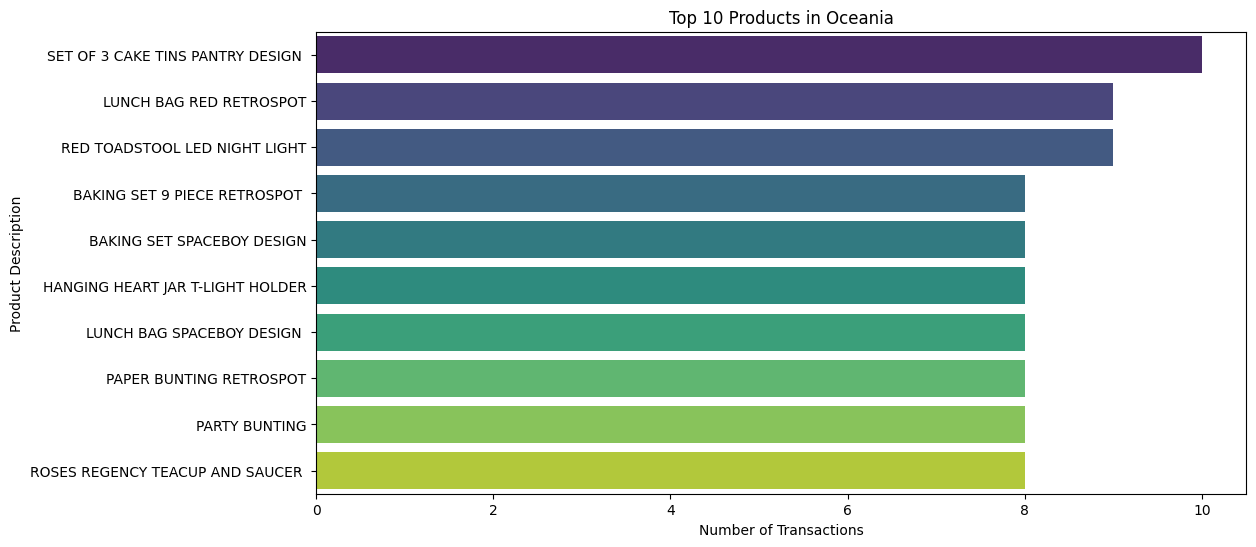

<ipython-input-11-0504ad97fe38>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Description', data=top_products, palette='viridis')


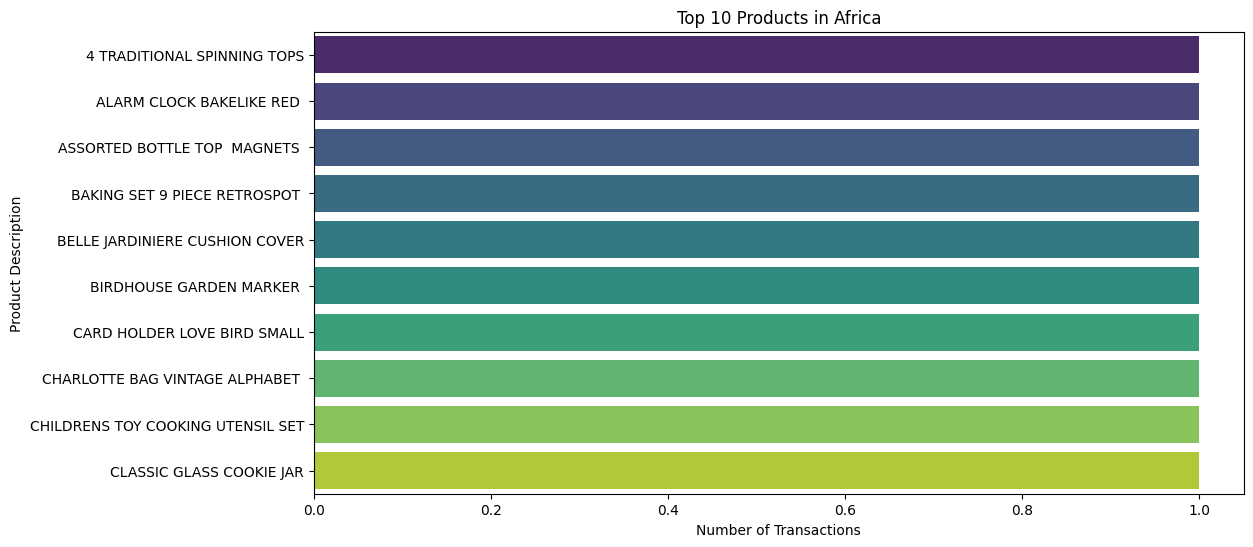

In [ ]:
# prompt: ทำกราฟ แสดง StockCode / Description: วิเคราะห์สินค้าที่ลูกค้าสนใจ ยอดนิยมในแต่ละ ทวีป

# นับจำนวนสินค้าแต่ละรายการในแต่ละทวีป
product_counts_by_continent = df.groupby(['Continent', 'Description'])['StockCode'].count().reset_index(name='Count')

# เรียงลำดับตามจำนวนสินค้า
product_counts_by_continent = product_counts_by_continent.sort_values(by=['Continent', 'Count'], ascending=[True, False])

# แสดงผลลัพธ์
display(product_counts_by_continent)

import matplotlib.pyplot as plt
import seaborn as sns

# เลือกทวีปที่ต้องการแสดงกราฟ (สามารถปรับได้)
continents_to_plot = ['Europe', 'Asia', 'North America',  'South America', 'Oceania', 'Africa']

# สร้างกราฟ
for continent in continents_to_plot:
    continent_data = product_counts_by_continent[product_counts_by_continent['Continent'] == continent]
    top_products = continent_data.head(10) # แสดงสินค้ายอดนิยม 10 อันดับแรกของแต่ละทวีป

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Description', data=top_products, palette='viridis')
    plt.title(f'Top 10 Products in {continent}')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Product Description')
    plt.show()

# **ยอดขายรวมของแต่ละทวีป**

In [ ]:
# prompt: จัดการ UnitPrice โดยสร้างคอลัมน์ใหม่ชื่อว่า TotalPrice นั่นคือทำราคาสินค้ารวมในแต่ละทวีปมา แสดงจากมากไปน้อย

# Calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by continent and sum TotalPrice
continent_total_price = df.groupby('Continent')['TotalPrice'].sum().sort_values(ascending=False)

# Display the result
continent_total_price

,TotalPrice
Continent,
Europe,9518669.774
Oceania,137077.270
Asia,79707.890
North America,5397.300
Unknown,4749.790
South America,1143.600
Africa,1002.310


<ipython-input-13-4a2bff525690>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Continent', y='TotalPrice', data=continent_total_price.reset_index(), palette='viridis') #reset_index to convert Continent to column


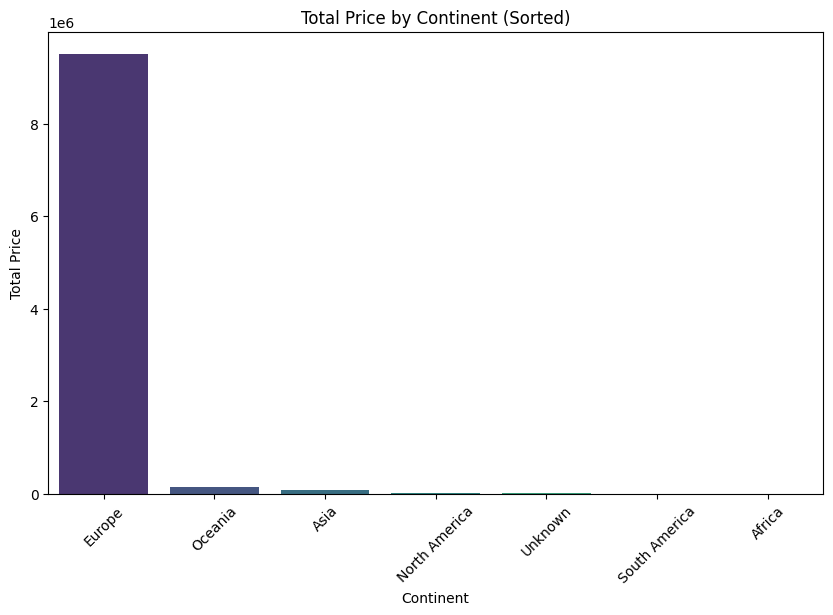

In [ ]:
# prompt: ทำกราฟ TotalPrice ในแต่ละทวีปมา เรียงจากมากไปน้อย

import matplotlib.pyplot as plt
import seaborn as sns

# Use the 'continent_total_price' DataFrame, which is already sorted
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='TotalPrice', data=continent_total_price.reset_index(), palette='viridis') #reset_index to convert Continent to column
plt.title('Total Price by Continent (Sorted)')
plt.xlabel('Continent')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

## ประโยชน์ของกราฟนี้
สามารถช่วยวิเคราะห์ตลาดเป้าหมายในทวีป


*   ชี้ให้เห็นว่า ตลาดหลัก หรือกลุ่มลูกค้าที่มีกำลังซื้อสูงอยู่ที่ใด นั่นคือ ทวีป Europe
*   ช่วยตัดสินใจเพิ่มการทำโปรโมชั่นหรือการตลาดในทวีป ตัวอย่างเช่น ลงทุนในโฆษณาหรือการขยายสินค้าเพิ่มเติมในตลาดที่มียอดขายสูง

<ipython-input-14-bbf13b668bad>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Continent', y='TotalPrice', data=sorted_continent_total_price, palette='viridis')


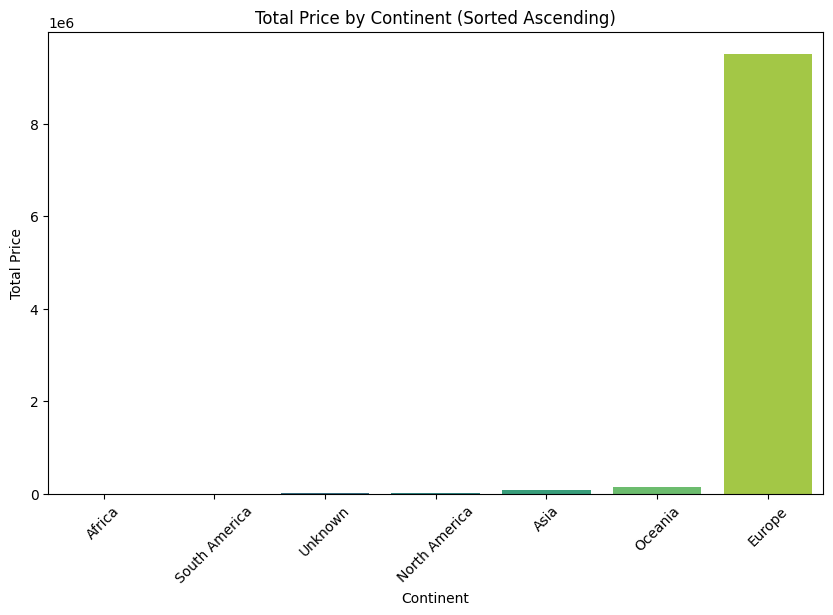

In [ ]:
# prompt: ทำกราฟ TotalPrice ในแต่ละทวีปมา เรียงจากน้อยไปมาก

# Assuming 'continent_total_price' DataFrame is already created as in your code

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Sort the Series and then convert it to a DataFrame for plotting.
sorted_continent_total_price = continent_total_price.sort_values().reset_index()
sns.barplot(x='Continent', y='TotalPrice', data=sorted_continent_total_price, palette='viridis')
plt.title('Total Price by Continent (Sorted Ascending)')
plt.xlabel('Continent')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

## ประโยชน์ของกราฟนี้
สามารถช่วยวิเคราะห์ตลาดเป้าหมาย

*   ระบุทวีปที่ ยอดขายน้อยหรือไม่เติบโต
*   ใช้เพื่อวิเคราะห์ปัญหา เช่น
สินค้าอาจไม่ตรงกับความต้องการในทวีปนั้น
ราคาสินค้าอาจไม่เหมาะสม
การขนส่งหรือช่องทางการขายอาจมีข้อจำกัด
*   ช่วยตัดสินใจว่าจะปรับกลยุทธ์เพื่อเพิ่มยอดขาย หรือเลือกไม่ลงทุนในตลาดทวีปเหล่านี้

##**ยอดขายรวมในแต่ละประเทศของแต่ละทวีป**

In [ ]:
# prompt: จัดการ UnitPrice โดยสร้างคอลัมน์ใหม่ชื่อว่า TotalPrice นั่นคือทำราคาสินค้ารวมในแต่ละประเทศและเอาทวีปมา แสดงจากมากไปน้อย

# Group data by continent and country, then sum TotalPrice
country_total_price = df.groupby(['Continent', 'Country'])['TotalPrice'].sum().reset_index()

# Sort the result by TotalPrice in descending order
country_total_price_sorted = country_total_price.sort_values(by='TotalPrice', ascending=False)

# Display the sorted result
display(country_total_price_sorted)

,Continent,Country,TotalPrice
32,Europe,United Kingdom,8187806.364
25,Europe,Netherlands,284661.540
15,Europe,EIRE,263276.820
19,Europe,Germany,221698.210
18,Europe,France,197403.900
35,Oceania,Australia,137077.270
31,Europe,Switzerland,56385.350
29,Europe,Spain,54774.580
11,Europe,Belgium,40910.960
30,Europe,Sweden,36595.910


<ipython-input-16-cc39b37fd792>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='TotalPrice', data=top_5_countries, palette='viridis')


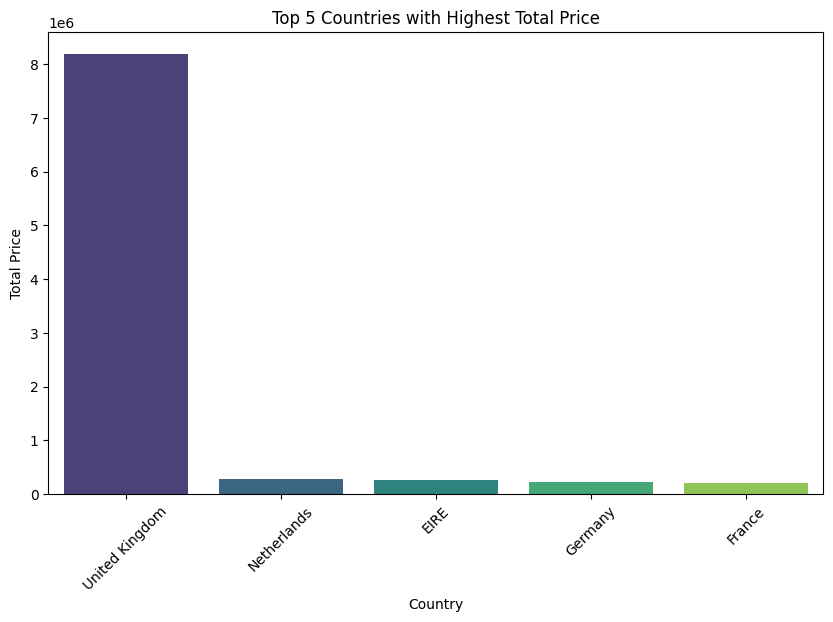

In [ ]:
# prompt: ทำกราฟ  TotalPrice ในแต่ละประเทศมา 5 อันดับ TotalPrice มากสุด

# Sort the country_total_price DataFrame by TotalPrice in descending order
country_total_price_sorted = country_total_price.sort_values(by='TotalPrice', ascending=False)

# Get the top 5 countries with the highest TotalPrice
top_5_countries = country_total_price_sorted.head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='TotalPrice', data=top_5_countries, palette='viridis')
plt.title('Top 5 Countries with Highest Total Price')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## ประโยชน์ของกราฟนี้
สามารถช่วยวิเคราะห์ตลาดเป้าหมาย


*   ชี้ให้เห็นว่า ตลาดหลัก หรือกลุ่มลูกค้าที่มีกำลังซื้อสูงอยู่ที่ใด นั่นคือ ประเทศ United Kingdom ที่อยู่ในทวีป Europe
*   ช่วยตัดสินใจเพิ่มการทำโปรโมชั่นหรือการตลาดในประเทศเหล่านี้ ตัวอย่างเช่น ลงทุนในโฆษณาหรือการขยายสินค้าเพิ่มเติมในตลาดที่มียอดขายสูง




In [ ]:
# prompt: TotalPrice ในแต่ละประเทศมา 5 อันดับ TotalPrice น้อยสุด (แสดงด้วยว่าประเทศนั้นมาจากทวีปอะไร) เอาแค่ 5 อันดับ

# Group data by 'Country' and 'Continent', then sum 'TotalPrice'
country_continent_total_price = df.groupby(['Country', 'Continent'])['TotalPrice'].sum().reset_index()

# Sort the result by 'TotalPrice' in ascending order
country_continent_total_price_sorted = country_continent_total_price.sort_values(by='TotalPrice', ascending=True)

# Get the top 5 countries with the lowest TotalPrice for each continent
top_5_lowest_price_by_continent = country_continent_total_price_sorted.groupby('Continent').head(5)

# Display the result
display(top_5_lowest_price_by_continent)

,Country,Continent,TotalPrice
29,Saudi Arabia,Asia,131.17
2,Bahrain,Asia,548.40
8,Czech Republic,Europe,707.72
28,RSA,Africa,1002.31
4,Brazil,South America,1143.60
11,European Community,Europe,1291.75
22,Lithuania,Europe,1661.06
21,Lebanon,Asia,1693.88
34,USA,North America,1730.92
35,United Arab Emirates,Asia,1902.28


<ipython-input-18-73dd19fd2137>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='TotalPrice', data=top_5_lowest_price_countries, palette='viridis')


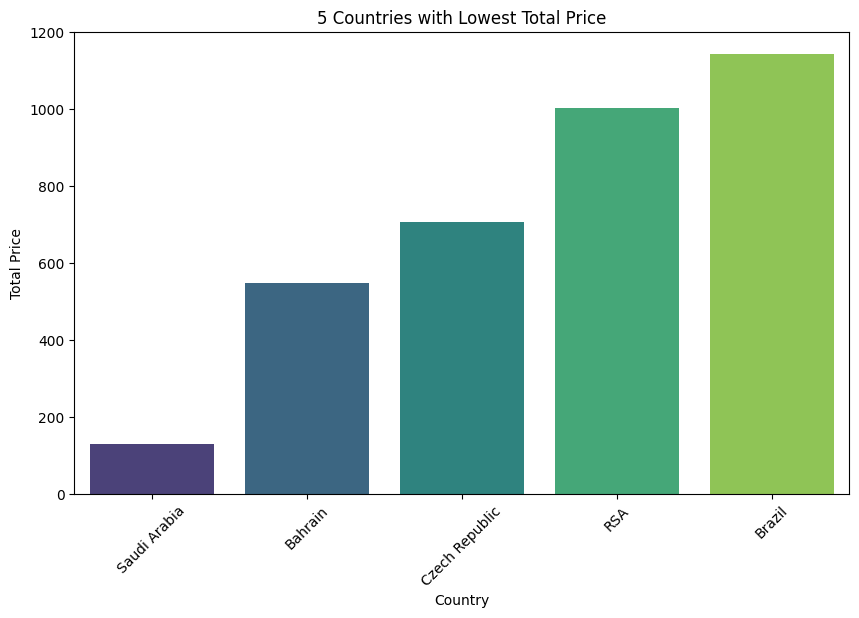

In [ ]:
# prompt: ทำกราฟ  TotalPrice ในแต่ละประเทศมา  TotalPrice น้อยสุด (เอาแค่ 5 อันดับ)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'country_continent_total_price' DataFrame is already created as in your code
# ... (your existing code) ...

# Sort the country_continent_total_price DataFrame by TotalPrice in ascending order
country_continent_total_price_sorted = country_continent_total_price.sort_values(by='TotalPrice', ascending=True)

# Get the top 5 countries with the lowest TotalPrice
top_5_lowest_price_countries = country_continent_total_price_sorted.head(5)


# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='TotalPrice', data=top_5_lowest_price_countries, palette='viridis')
plt.title('5 Countries with Lowest Total Price')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## ประโยชน์ของกราฟนี้
สามารถช่วยวิเคราะห์ตลาดเป้าหมาย


*   ระบุประเทศที่ ยอดขายน้อยหรือไม่เติบโต
*   ใช้เพื่อวิเคราะห์ปัญหา เช่น
สินค้าอาจไม่ตรงกับความต้องการในประเทศนั้น
ราคาสินค้าอาจไม่เหมาะสม
การขนส่งหรือช่องทางการขายอาจมีข้อจำกัด
*   ช่วยตัดสินใจว่าจะปรับกลยุทธ์เพื่อเพิ่มยอดขาย หรือเลือกไม่ลงทุนในตลาดเหล่านี้



##**ยอดขายรายปีในแต่ละทวีป**
(ดูและเปรียบเทียบยอดขายของ สองปีในทวีปเดียวกัน มีประโยชน์ในหลายมุมมองเชิงธุรกิจและการตลาด โดยเฉพาะอย่างยิ่งเพื่อทำความเข้าใจแนวโน้มและปัจจัยที่ส่งผลต่อยอดขายในแต่ละปี)
เช่น

*   ยอดขายในทวีปเพิ่มขึ้น → ควรวางแผนเพิ่มการตลาดในทวีปนี้
*   ยอดขายในทวีปลดลง → วิเคราะห์ปัญหาว่า สินค้าอาจไม่ตอบโจทย์ หรือความสามารถในการแข่งขันลดลง

In [ ]:
# prompt: แยก InvoiceDate ออกมาเป็นคอลลัมน์ใหม่ที่เอาแค่ปี ชื่อ InvoiceYear พร้อมแสดงปี

# Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the year from 'InvoiceDate' and create 'InvoiceYear' column
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# Display unique years in the 'InvoiceYear' column
print(df['InvoiceYear'].unique())

[2010 2011]


In [ ]:
# prompt: แสดงข้อมูล InvoiceYear ของแต่ละทวีป แสดงข้อมูลจาก TotalPrice มากไปน้อย

# Group data by 'Continent' and 'InvoiceYear', then sum 'TotalPrice'
yearly_sales_by_continent = df.groupby(['Continent', 'InvoiceYear'])['TotalPrice'].sum().reset_index()

# Sort the result by 'TotalPrice' in descending order
yearly_sales_by_continent_sorted = yearly_sales_by_continent.sort_values(by='TotalPrice', ascending=False)

# Display the sorted result
display(yearly_sales_by_continent_sorted)

,Continent,InvoiceYear,TotalPrice
4,Europe,2011,8779992.044
3,Europe,2010,738677.730
7,Oceania,2011,136072.170
2,Asia,2011,70433.700
1,Asia,2010,9274.190
5,North America,2011,5397.300
9,Unknown,2011,4749.790
8,South America,2011,1143.600
6,Oceania,2010,1005.100
0,Africa,2011,1002.310


<ipython-input-21-f55e58b04c20>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InvoiceYear', y='TotalPrice', data=europe_sales_sorted, palette=['red', 'blue'])


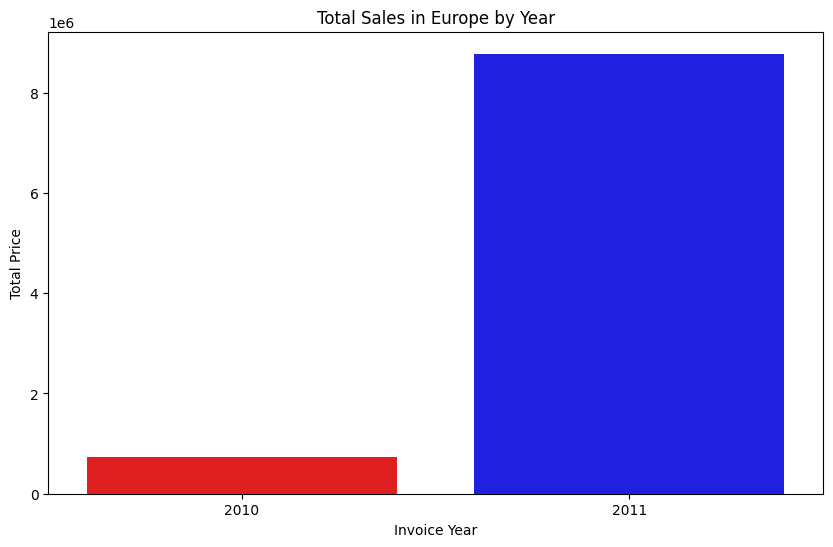

In [ ]:
# prompt: ทำกราฟ InvoiceYear ทั้งสองปี ของทวีป Europe

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Europe
europe_sales = yearly_sales_by_continent[yearly_sales_by_continent['Continent'] == 'Europe']

# Sort by TotalPrice in descending order
europe_sales_sorted = europe_sales.sort_values(by='TotalPrice', ascending=False)

# Create the bar plot with specified colors
plt.figure(figsize=(10, 6))
sns.barplot(x='InvoiceYear', y='TotalPrice', data=europe_sales_sorted, palette=['red', 'blue'])
plt.title('Total Sales in Europe by Year')
plt.xlabel('Invoice Year')
plt.ylabel('Total Price')
plt.show()

<ipython-input-22-a2f923dfb0d5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InvoiceYear', y='TotalPrice', data=oceania_sales_sorted, palette=['skyblue', 'lightgreen'])


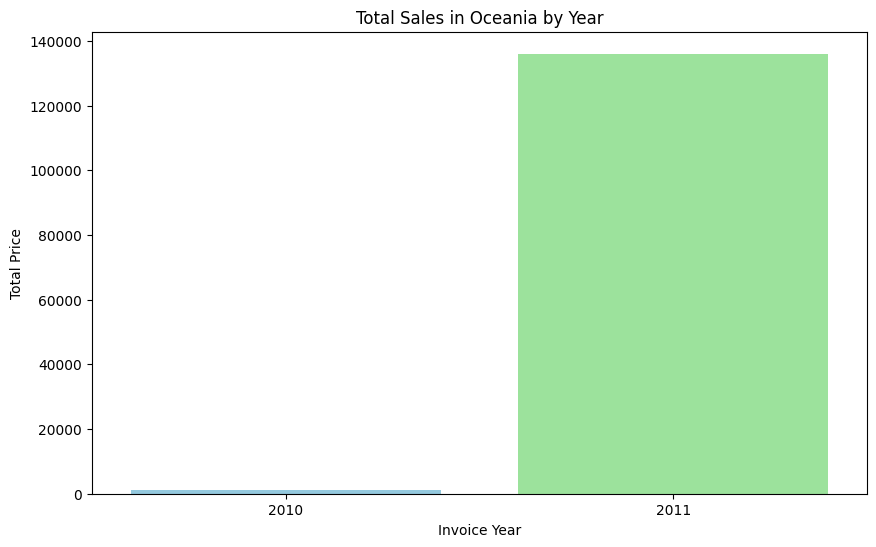

In [ ]:
# prompt: ทำกราฟ InvoiceYear ทั้งสองปี ของทวีป Oceania

# Filter data for Oceania
oceania_sales = yearly_sales_by_continent[yearly_sales_by_continent['Continent'] == 'Oceania']

# Sort by TotalPrice in descending order
oceania_sales_sorted = oceania_sales.sort_values(by='TotalPrice', ascending=False)

# Create the bar plot with specified colors
plt.figure(figsize=(10, 6))
sns.barplot(x='InvoiceYear', y='TotalPrice', data=oceania_sales_sorted, palette=['skyblue', 'lightgreen'])
plt.title('Total Sales in Oceania by Year')
plt.xlabel('Invoice Year')
plt.ylabel('Total Price')
plt.show()

<ipython-input-23-58dbea61b2f9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InvoiceYear', y='TotalPrice', data=asia_sales_sorted, palette=['orange', 'purple'])


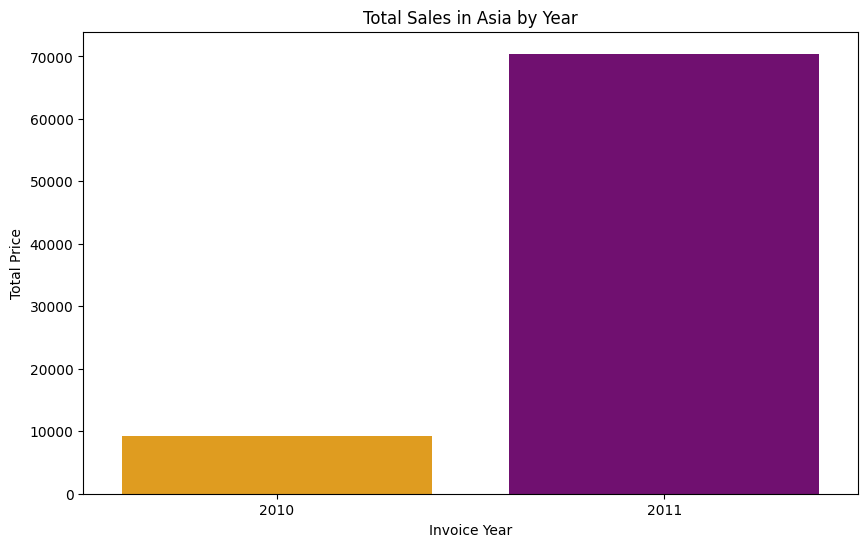

In [ ]:
# prompt: ทำกราฟ InvoiceYear ทั้งสองปี ของทวีป Asia

# Filter data for Asia
asia_sales = yearly_sales_by_continent[yearly_sales_by_continent['Continent'] == 'Asia']

# Sort by InvoiceYear
asia_sales_sorted = asia_sales.sort_values(by='InvoiceYear')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='InvoiceYear', y='TotalPrice', data=asia_sales_sorted, palette=['orange', 'purple'])
plt.title('Total Sales in Asia by Year')
plt.xlabel('Invoice Year')
plt.ylabel('Total Price')
plt.show()

<ipython-input-24-2fc1227d8557>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InvoiceYear', y='TotalPrice', data=north_america_sales_sorted, palette=['green', 'purple'])
<ipython-input-24-2fc1227d8557>:11: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='InvoiceYear', y='TotalPrice', data=north_america_sales_sorted, palette=['green', 'purple'])


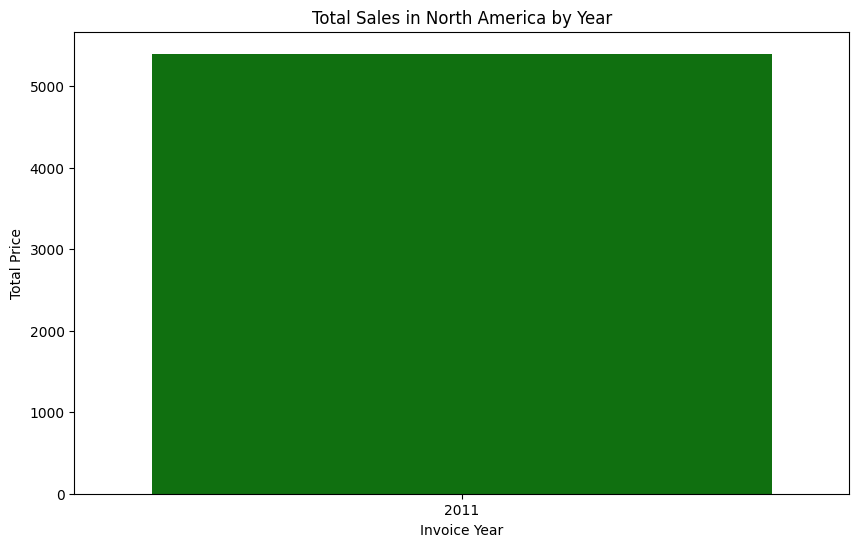

In [ ]:
# prompt: ทำกราฟ InvoiceYear ทั้งสองปี ของทวีปNorth America

# Filter data for North America
north_america_sales = yearly_sales_by_continent[yearly_sales_by_continent['Continent'] == 'North America']

# Sort by InvoiceYear
north_america_sales_sorted = north_america_sales.sort_values(by='InvoiceYear')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='InvoiceYear', y='TotalPrice', data=north_america_sales_sorted, palette=['green', 'purple'])
plt.title('Total Sales in North America by Year')
plt.xlabel('Invoice Year')
plt.ylabel('Total Price')
plt.show()

<ipython-input-25-c741314c8fca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InvoiceYear', y='TotalPrice', data=unknown_sales_sorted, palette=['pink', 'gray'])
<ipython-input-25-c741314c8fca>:11: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='InvoiceYear', y='TotalPrice', data=unknown_sales_sorted, palette=['pink', 'gray'])


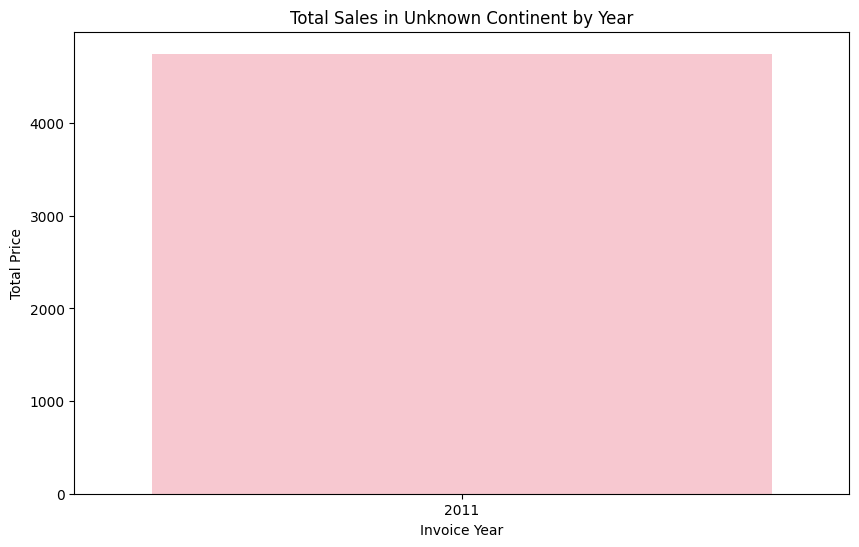

In [ ]:
# prompt: ทำกราฟ InvoiceYear ทั้งสองปี ของทวีป Unknown

# Filter data for Unknown continent
unknown_sales = yearly_sales_by_continent[yearly_sales_by_continent['Continent'] == 'Unknown']

# Sort by InvoiceYear (if needed)
unknown_sales_sorted = unknown_sales.sort_values(by='InvoiceYear')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='InvoiceYear', y='TotalPrice', data=unknown_sales_sorted, palette=['pink', 'gray'])
plt.title('Total Sales in Unknown Continent by Year')
plt.xlabel('Invoice Year')
plt.ylabel('Total Price')
plt.show()

<ipython-input-26-259821c61a20>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InvoiceYear', y='TotalPrice', data=africa_sales_sorted, palette=['gold', 'skyblue'])
<ipython-input-26-259821c61a20>:11: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='InvoiceYear', y='TotalPrice', data=africa_sales_sorted, palette=['gold', 'skyblue'])


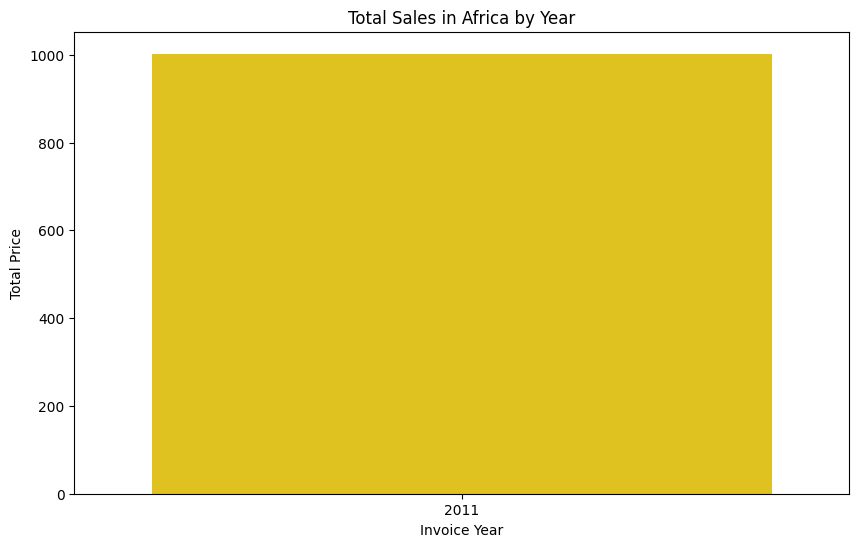

In [ ]:
# prompt: ทำกราฟ InvoiceYear ทั้งสองปี ของทวีป Africa

# Filter data for Africa
africa_sales = yearly_sales_by_continent[yearly_sales_by_continent['Continent'] == 'Africa']

# Sort by InvoiceYear
africa_sales_sorted = africa_sales.sort_values(by='InvoiceYear')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='InvoiceYear', y='TotalPrice', data=africa_sales_sorted, palette=['gold', 'skyblue'])
plt.title('Total Sales in Africa by Year')
plt.xlabel('Invoice Year')
plt.ylabel('Total Price')
plt.show()

## **ยอดขายในแต่ละเดือนของแต่ละทวีป**
มีประโยชน์เรื่อง
*   เข้าใจแนวโน้มและฤดูกาลที่ส่งผลต่อยอดขาย
*   ปรับปรุงแผนการตลาดและแคมเปญให้เหมาะสม
*   จัดการซัพพลายเชนและการผลิตสินค้าได้อย่างมีประสิทธิภาพ
*   วางแผนงบประมาณและทรัพยากรให้สอดคล้องกับพฤติกรรมผู้บริโภคในแต่ละพื้นที่




สร้างคอลลัมน์แยกจาก  InvoiceDate เป็นคอลลัมน์ใหม่แยกออกมาได้แก่  InvoiceYear, InvoiceYearMonth, InvoiceMonth

In [ ]:
# Convert 'InvoiceDate' to datetime objects if not already done
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from 'InvoiceDate'
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Create a dictionary to map month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Map month numbers to month names in the 'InvoiceMonth' column
df['InvoiceMonth'] = df['InvoiceMonth'].map(month_mapping)

# Display the updated DataFrame to verify the new column
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country Continent  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom    Europe   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom    Europe   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom    Europe   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom    Europe   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom    Europe   

   TotalPrice  InvoiceYear InvoiceMonth  
0       15.30         2010     December  
1       20.34         2010     December  
2 

# **ทำ Sunburst Chart แสดง Quantity และ TotalPrice ของแต่ละทวีป**

In [ ]:
# prompt: ทำ Sunburst Chart กับทวีป แสดง Quantity และ TotalPrice
# Assuming 'df' is already loaded and processed as in your provided code.

import plotly.express as px

# Assuming 'df' is your DataFrame and it's already processed as in your provided code.
# Make sure you have the necessary columns: 'Continent', 'Country', 'Quantity', 'TotalPrice'

# Filter for specified continents
continents_to_show = ['Europe','Oceania', 'Asia', 'North America', 'Unknown', 'South America', 'Africa']
filtered_df = df[df['Continent'].isin(continents_to_show)]

# Create the sunburst chart
fig = px.sunburst(
    filtered_df,
    path=['Continent', 'Country'],
    values='Quantity',
    hover_data=['TotalPrice', 'Quantity'],
    color='TotalPrice',
    color_continuous_scale='RdBu',
    title='Quantity and TotalPrice by Continent and Country'
)

fig.show()

In [ ]:
continents_to_show = ['Europe','Oceania', 'Asia']
filtered_df = df[df['Continent'].isin(continents_to_show)]

# Create the sunburst chart
fig = px.sunburst(
    filtered_df,
    path=['Continent', 'Country'],
    values='Quantity',
    hover_data=['TotalPrice', 'Quantity'],
    color='TotalPrice',
    color_continuous_scale='RdBu',
    title='Quantity and TotalPrice by Continent and Country'
)

fig.show()

In [ ]:
continents_to_show = ['North America', 'Unknown', 'South America', 'Africa']
filtered_df = df[df['Continent'].isin(continents_to_show)]

# Create the sunburst chart
fig = px.sunburst(
    filtered_df,
    path=['Continent', 'Country'],
    values='Quantity',
    hover_data=['TotalPrice', 'Quantity'],
    color='TotalPrice',
    color_continuous_scale='RdBu',
    title='Quantity and TotalPrice by Continent and Country'
)

fig.show()

In [ ]:
# Group by continent and sum TotalPrice and Quantity
continent_summary = df.groupby('Continent').agg({'TotalPrice': 'sum', 'Quantity': 'sum'})

# Display the result
continent_summary

,TotalPrice,Quantity
Continent,,
Africa,1002.310,352
Asia,79707.890,47594
Europe,9518669.774,5037398
North America,5397.300,3797
Oceania,137077.270,83653
South America,1143.600,356
Unknown,4749.790,3300


In [ ]:
# prompt: ทำ Sunburst Chart กับทวีป แสดง 'TotalPrice', 'Quantity' ของ InvoiceYear'

# Group the data by continent and InvoiceYear, then sum 'TotalPrice' and 'Quantity'
continent_yearly_summary = df.groupby(['Continent', 'InvoiceYear']).agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()

# Create the sunburst chart
fig = px.sunburst(
    continent_yearly_summary,
    path=['Continent', 'InvoiceYear'],
    values='Quantity',  # Use 'Quantity' as the value for the sunburst segments
    hover_data=['TotalPrice', 'Quantity'],  # Show TotalPrice and Quantity on hover
    color='TotalPrice',  # Color segments by TotalPrice
    color_continuous_scale='RdBu',  # Use a color scale
    title='Quantity and TotalPrice by Continent and InvoiceYear'
)

fig.show()

In [ ]:
# Filter for specified continents
continents_to_show = ['Europe', 'Oceania', 'Asia']
filtered_df = df[df['Continent'].isin(continents_to_show)]

# Group by continent and InvoiceYear, then sum 'TotalPrice' and 'Quantity'
continent_yearly_summary = filtered_df.groupby(['Continent', 'InvoiceYear']).agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()

# Create the sunburst chart
fig = px.sunburst(
    continent_yearly_summary,
    path=['Continent', 'InvoiceYear'],
    values='Quantity',  # Use 'Quantity' as the value for the sunburst segments
    hover_data=['TotalPrice', 'Quantity'],  # Show TotalPrice and Quantity on hover
    color='TotalPrice',  # Color segments by TotalPrice
    color_continuous_scale='RdBu',  # Use a color scale
    title='Quantity and Total Price by Continent and Invoice Year (Europe, Oceania, Asia)'
)

fig.show()

In [ ]:
# prompt: ทำ Sunburst Chart กับทวีป แสดงยอดขายรวมของ InvoiceYear' แสดง Quantity เอาแค่ทวีป 'North America', 'Unknown', 'South America', 'Africa'

# Filter for specified continents and create the sunburst chart
continents_to_show = ['North America', 'Unknown', 'South America', 'Africa']
filtered_df = df[df['Continent'].isin(continents_to_show)]

fig = px.sunburst(
    filtered_df,
    path=['Continent', 'InvoiceYear'],
    values='Quantity',
    hover_data=['TotalPrice', 'Quantity'],
    color='TotalPrice',
    color_continuous_scale='RdBu',
    title='Quantity and TotalPrice by Continent and InvoiceYear'
)

fig.show()

In [ ]:
# prompt: ทำ Sunburst Chart กับทวีป แสดงยอดขายรวมของ InvoiceMonth' แสดง Quantity
# Filter for specified continents and InvoiceMonth, then create the sunburst chart
continents_to_show = ['Europe','Oceania', 'Asia', 'North America', 'Unknown', 'South America', 'Africa']
filtered_df = df[df['Continent'].isin(continents_to_show)]

fig = px.sunburst(
    filtered_df,
    path=['Continent', 'InvoiceMonth'],
    values='Quantity',
    hover_data=['TotalPrice', 'Quantity'],
    color='TotalPrice',
    color_continuous_scale='RdBu',
    title='Quantity and TotalPrice by Continent and InvoiceMonth'
)

fig.show()

In [ ]:
# prompt: ทำ Sunburst Chart กับทวีป แสดงยอดขายรวมของ InvoiceMonth' แสดง Quantity  เอาแค่ทวีป 'Europe','Oceania', 'Asia'

# Filter for specified continents and create the sunburst chart
continents_to_show = ['Europe', 'Oceania', 'Asia']
filtered_df = df[df['Continent'].isin(continents_to_show)]

fig = px.sunburst(
    filtered_df,
    path=['Continent', 'InvoiceMonth'],
    values='Quantity',
    hover_data=['TotalPrice', 'Quantity'],
    color='TotalPrice',
    color_continuous_scale='RdBu',
    title='Quantity and Total Price by Continent and Invoice Month (Europe, Oceania, Asia)'
)

fig.show()

In [ ]:
# prompt: ทำ Sunburst Chart กับทวีป แสดงยอดขายรวมของ InvoiceMonth' แสดง Quantity
# Filter for specified continents and InvoiceMonth, then create the sunburst chart
continents_to_show = ['North America', 'Unknown', 'South America', 'Africa']
filtered_df = df[df['Continent'].isin(continents_to_show)]

fig = px.sunburst(
    filtered_df,
    path=['Continent', 'InvoiceMonth'],
    values='Quantity',
    hover_data=['TotalPrice', 'Quantity'],
    color='TotalPrice',
    color_continuous_scale='RdBu',
    title='Quantity and TotalPrice by Continent and InvoiceMonth'
)

fig.show()

#**ข้อ 2 สินค้าที่ซื้อคู่กันมากที่สุดในทวีปยุโรป ในแต่ละเดือน คือสินค้าอะไร ดูจาก StockCodet**

In [ ]:
# prompt: สินค้าซื้อคู่กันหรือซื้อพร้อมกันในลูกค้าคนเดียวกันในทวีปยุโรป ในแต่ละเดือน เอาอันดับมากสุดอันดับเดียวในแต่ละเดือนว่าคือสินค้าอะไร ดูจาก StockCode พร้อมแสดงชื่อสินค้า

import pandas as pd

# Assuming your DataFrame is named 'df' and it has columns 'InvoiceDate', 'Continent', 'StockCode', 'Description', and 'CustomerID'
# Also assuming 'InvoiceDate' is already converted to datetime objects and 'InvoiceMonth' column exists

# Filter data for Europe
europe_df = df[df['Continent'] == 'Europe']

# Group by month and customer, then count the number of unique StockCodes purchased together
monthly_product_pairs = europe_df.groupby(['InvoiceMonth', 'CustomerID'])['StockCode'].nunique().reset_index()

# Filter for customers who bought more than one unique product
monthly_product_pairs = monthly_product_pairs[monthly_product_pairs['StockCode'] > 1]

# Group by month and StockCode, then count occurrences
top_product_pairs = monthly_product_pairs.groupby(['InvoiceMonth'])['StockCode'].count().reset_index()


# Find the most frequent product pair for each month
def find_top_pairs(month, data):
    # Create a list to hold the top product pairs for the current month
    top_pairs = []
    # Filter the data to include only rows with the specified month
    month_data = data[data['InvoiceMonth'] == month]
    # Iterate over all unique customer IDs within the month
    for customer_id in month_data['CustomerID'].unique():
        # Filter the data to include only rows with the specified customer ID
        customer_data = month_data[month_data['CustomerID'] == customer_id]
        # Extract a list of StockCodes for this customer
        stockcodes = customer_data['StockCode'].tolist()
        # If the customer bought more than one product
        if len(stockcodes) > 1:
            # Iterate over all possible pairs of StockCodes for the current customer
            for i in range(len(stockcodes)):
                for j in range(i + 1, len(stockcodes)):
                    pair = tuple(sorted((stockcodes[i], stockcodes[j]))) # Sort to handle order variance
                    top_pairs.append(pair)
    # If there are product pairs for the current month
    if top_pairs:
        pair_counts = pd.Series(top_pairs).value_counts().reset_index()
        pair_counts.columns = ['Pair', 'Count']
        top_pair = pair_counts.iloc[0] # Pick only top 1
        return top_pair['Pair'] # Return the most frequent pair
    else:
        return None  # Handle the case with no pairs for the month


results = []
for month in europe_df['InvoiceMonth'].unique():
    top_pair = find_top_pairs(month, europe_df)
    if top_pair:
        #Find Description for Stockcode
        description1 = europe_df[(europe_df['StockCode'] == top_pair[0])]['Description'].iloc[0] if not europe_df[(europe_df['StockCode'] == top_pair[0])]['Description'].empty else "Not Found"
        description2 = europe_df[(europe_df['StockCode'] == top_pair[1])]['Description'].iloc[0] if not europe_df[(europe_df['StockCode'] == top_pair[1])]['Description'].empty else "Not Found"

        results.append({
            'InvoiceMonth': month,
            'TopPair': top_pair,
            'Description1': description1,
            'Description2': description2
        })


# Convert list to DataFrame
result_df = pd.DataFrame(results)

# Display the results
result_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceMonth,TopPair,Description1,Description2
0,December,"(84029G, 85123A)",KNITTED UNION FLAG HOT WATER BOTTLE,WHITE HANGING HEART T-LIGHT HOLDER
1,January,"(22720, 22722)",SET OF 3 CAKE TINS PANTRY DESIGN,SET OF 6 SPICE TINS PANTRY DESIGN
2,February,"(22720, 22722)",SET OF 3 CAKE TINS PANTRY DESIGN,SET OF 6 SPICE TINS PANTRY DESIGN
3,March,"(22720, 22722)",SET OF 3 CAKE TINS PANTRY DESIGN,SET OF 6 SPICE TINS PANTRY DESIGN
4,April,"(22698, 22699)",PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER
5,May,"(22383, 23206)",LUNCH BAG SUKI DESIGN,LUNCH BAG APPLE DESIGN
6,June,"(22697, 22698)",GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER
7,July,"(20728, 22384)",LUNCH BAG CARS BLUE,LUNCH BAG PINK POLKADOT
8,August,"(20725, 22383)",LUNCH BAG RED RETROSPOT,LUNCH BAG SUKI DESIGN
9,September,"(23203, 85099B)",mailout,JUMBO BAG RED RETROSPOT
